In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


Total de jogos: 288
Vitórias do time 1 (team_1): 166
Vitórias do time 2 (team_2): 122
Percentual de vitórias do lado azul: 57.64%


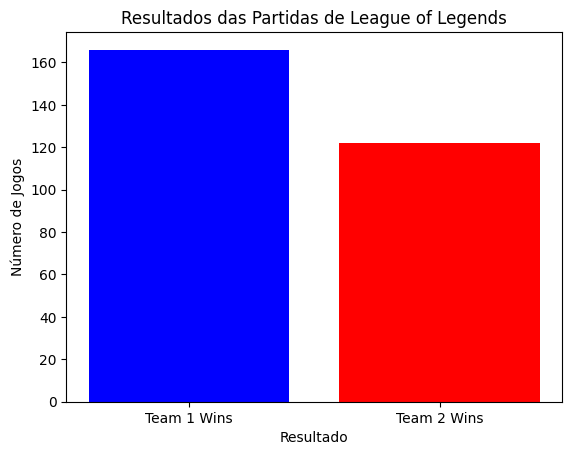

In [7]:
file_path = '../../repository/lec/LEC_matches_2.csv'

# Carregar os dados organizados
df = pd.read_csv(file_path)

# Total de jogos
total_matches = df.shape[0]

# Contagem de vitórias
team_1_wins = (df['winner'] == df['team_1']).sum()
team_2_wins = (df['winner'] == df['team_2']).sum()


# Lista de valores para os times e seus resultados
win_counts = [team_1_wins, team_2_wins]

# Cálculo da porcentagem de vitórias do time 1
team_1_win_rate = (team_1_wins / total_matches) * 100

# Exibir estatísticas
print("Total de jogos:", total_matches)
print("Vitórias do time 1 (team_1):", team_1_wins)
print("Vitórias do time 2 (team_2):", team_2_wins)
print(f"Percentual de vitórias do lado azul: {team_1_win_rate:.2f}%")

# Criar gráfico de barras
x = ['Team 1 Wins', 'Team 2 Wins']
y = win_counts

plt.bar(x, y, color=['blue', 'red'])
plt.xlabel('Resultado')
plt.ylabel('Número de Jogos')
plt.title('Resultados das Partidas de League of Legends')
plt.show()

In [8]:
matches_df = pd.read_csv(file_path)
# Encode team names and league
le_team = LabelEncoder()
le_league = LabelEncoder()

matches_df['team_1_encoded'] = le_team.fit_transform(matches_df['team_1'])
matches_df['team_2_encoded'] = le_team.fit_transform(matches_df['team_2'])
matches_df['league_encoded'] = le_league.fit_transform(matches_df['league'])

# Features: team names and league
X = matches_df[['team_1_encoded', 'team_2_encoded', 'league_encoded']]

# Target: winner (encoded as 0 or 1 based on whether team_1 is the winner)
y = (matches_df['winner'] == matches_df['team_1']).astype(int)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo Naive Bayes
model = GaussianNB()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo de Naive Bayes: {accuracy * 100:.2f}%')

Acurácia do modelo de Naive Bayes: 54.02%


In [10]:
# Criar o modelo de Regressão Logística
logistic_model = LogisticRegression()

# Treinar o modelo
logistic_model.fit(X_train, y_train)

# Fazer previsões
y_pred_logistic = logistic_model.predict(X_test)

# Calcular a acurácia
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Acurácia do modelo de Regressão Logística: {accuracy_logistic * 100:.2f}%')

Acurácia do modelo de Regressão Logística: 54.02%
